Version 21.09.2023, A. S. Lundervold.

[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/HVL-ML/DAT158/blob/master/notebooks/DAT158-1.4-Multiclass_classification.ipynb)  &nbsp; [![kaggle](https://camo.githubusercontent.com/a08ca511178e691ace596a95d334f73cf4ce06e83a5c4a5169b8bb68cac27bef/68747470733a2f2f6b6167676c652e636f6d2f7374617469632f696d616765732f6f70656e2d696e2d6b6167676c652e737667)](https://www.kaggle.com/alexanderlundervold/2023-dat158-1-4-multiclass-classification-ipynb)

In [2]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory
# or on Kaggle, as that makes some difference for the code below.
# We'll do this in every notebook of the course.
try:
    import colab
    colab=True
except:
    colab=False

import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#The-data:-The-MNIST-data-set" data-toc-modified-id="The-data:-The-MNIST-data-set-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The data: The MNIST data set</a></span></li><li><span><a href="#Get-the-data" data-toc-modified-id="Get-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Get the data</a></span></li><li><span><a href="#Creating-training-and-test-sets" data-toc-modified-id="Creating-training-and-test-sets-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Creating training and test sets</a></span></li><li><span><a href="#Explore-the-data" data-toc-modified-id="Explore-the-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Explore the data</a></span></li><li><span><a href="#Multiclass-classification-model" data-toc-modified-id="Multiclass-classification-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Multiclass classification model</a></span><ul class="toc-item"><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Cross-validation" data-toc-modified-id="Cross-validation-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Cross-validation</a></span></li><li><span><a href="#Accuracy-on-the-test-set" data-toc-modified-id="Accuracy-on-the-test-set-7.1.2"><span class="toc-item-num">7.1.2&nbsp;&nbsp;</span>Accuracy on the test set</a></span></li><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-7.1.3"><span class="toc-item-num">7.1.3&nbsp;&nbsp;</span>Confusion matrix</a></span></li></ul></li></ul></li><li><span><a href="#Error-analysis" data-toc-modified-id="Error-analysis-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Error analysis</a></span><ul class="toc-item"><li><span><a href="#Analyzing-individual-errors" data-toc-modified-id="Analyzing-individual-errors-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Analyzing individual errors</a></span></li></ul></li><li><span><a href="#End" data-toc-modified-id="End-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>End</a></span></li></ul></div>

The notebook is partly based on the textbook's Chapter 3. You should also have a look at Geron's notebook: https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb.

# Introduction

In this notebook, we pick up where we left off in `DAT158-1.3-Binary_classification.ipynb`. We shift our focus from binary to **multiclass classifiers**, and we'll explore this concept through a hands-on example. By the end of this session, you should be able to understand multiclass classification and how to evaluate such models effectively.

<img src="https://github.com/alu042/DAT158-2022/raw/main/notebooks/assets/MnistExamples.png">

# Setup

In [3]:
# To display plots directly in the notebook:
%matplotlib inline

We import our standard framework:

In [4]:
# For this notebook, we need to make sure we're using an updated 
# version of scikit-learn if using Colab:
if colab:
    !pip install scikit-learn --upgrade

In [5]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
import sklearn

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Set the directory in which to store data
NB_DIR = Path.cwd()       # Set NB_DIR to be the current working directory
DATA = NB_DIR/'data'      # The data dir is the subdirectory 'data' under NB_DIR

DATA.mkdir(exist_ok=True) # Create the data directory

# The data: The MNIST data set

We'll base our discussion on a famous benchmark dataset: **MNIST**

<img src="https://github.com/alu042/DAT158-2022/raw/main/notebooks/assets/MnistExamples.png">

The MNIST dataset is a collection of 70,000 images of handwritten digits. It's a classic dataset often used in machine learning to introduce multiclass classification. It has been called "the machine learning equivalent of fruit flies" because it's complex enough to be challenging yet simple enough to be approachable. Have a look at https://en.wikipedia.org/wiki/MNIST_database and http://yann.lecun.com/exdb/mnist/ for more details.

Our goal is to construct a system that can take an image from MNIST as input and produce the correct digit 0, ..., 9 as output. This is a **multiclass system** as there are more than two possible outcomes (in contrast to our previous example of True or False for diabetes).

<centering>
<img src="https://github.com/alu042/DAT158-2022/raw/main/notebooks/assets/MNIST-goal.png">
</centering>

Correctly classifying handwritten digits is a difficult problem. Can you come up with features that characterize all the number 2's but none of the other digits? How can you program rules that detect only 2's?

<centering>
<img src="https://github.com/alu042/DAT158-2022/raw/main/notebooks/assets/mnist-difficult.png">
</centering>

<span style="font-size:smaller">Image from G. Hinton's Coursera course [Neural Networks for Machine Learning](https://www.cs.toronto.edu/~hinton/coursera_lectures.html), now [discontinued](https://twitter.com/geoffreyhinton/status/1085325734044991489) </span>

# Get the data

[OpenML](https://www.openml.org/) is a convenient source (among many others) of machine learning data, containing MNIST among many other standard data sets. Scikit-learn has a method we can use to fetch data from OpenML:

In [8]:
from sklearn.datasets import fetch_openml

In [9]:
mnist = fetch_openml('mnist_784', version=1, data_home='./data', return_X_y=True)

Each of the 70,000 images in the dataset is a 28x28 pixel grid, flattened into a 784-dimensional vector. We're going to treat each image as represented by a feature vector of length 28*28=784.

In [10]:
mnist[0].head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are 70.000 labels, one for each image (i.e. each row of the data frame):

In [11]:
mnist[1].shape

(70000,)

We store the features in X and the target labels in y, as usual:

In [12]:
X = mnist[0]
y = mnist[1]

# Creating training and test sets

As we've previously discussed, once we have our data, it's crucial to partition it into training and test sets. This allows us to evaluate how well our model generalizes to new, unseen data

> We're not interested in how well our models perform on the training set; we're really after how well they generalize to unseen data.

<img width=50% src="https://github.com/alu042/DAT158-2022/raw/main/notebooks/assets/testsplit.png"> 

We'll use the first 60.000 images as our training data and the last 10.000 as test. This is the standard split for the benchmark dataset MNIST, allowing us to compare our results to those achieved by other methods. 

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Explore the data

As always, we should take a look at the training data. Having a feeling for the data's variation and quality and a sense of the task's difficulty is crucial for constructing machine learning models. When dealing with images, it's, of course, convenient to plot them.

In [14]:
some_digit = np.array(X_train.iloc[34500])

The images are vectors of length 784:

In [15]:
some_digit.shape

(784,)

In [16]:
28*28

784

To plot them we reshape to 28*28:

In [17]:
some_digit_image = some_digit.reshape(28,28)

Here's a small section of the image:

In [18]:
some_digit_image[15:20,15:20]

array([[ 19., 218., 231.,   9.,   0.],
       [  0.,  48., 254., 168.,   0.],
       [  0.,   7., 210., 232.,   0.],
       [  0.,  13., 222., 232.,   0.],
       [  3., 105., 254., 191.,   0.]])

The numbers represent grayscale values.

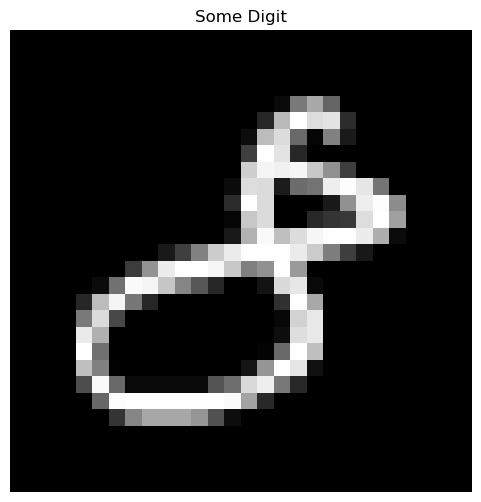

In [19]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(some_digit_image, cmap='gray')
ax.axis('off')
ax.set_title('Some Digit')
plt.show()

Let's make a small convenience function to plot MNIST images from the training set:

In [20]:
def plot_digit(image_idx):
    """
    Plot a digit image.

    Parameters:
    image_data (array-like): The image data to plot.
    """
    image_data = np.array(X_train.iloc[image_idx])
    image_data = np.array(image_data)
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

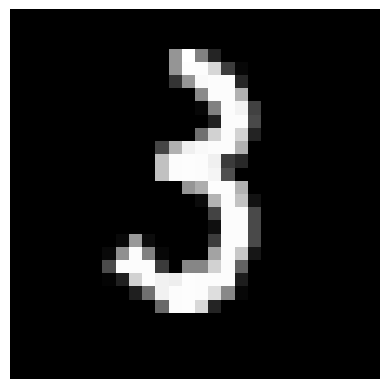

In [21]:
plot_digit(1234)

...and plot a random selection:

In [22]:
import random

In [23]:
def plot_digits(to_plot, nb):
    """
    Plot a set of digit images.

    Parameters:
    to_plot (list): A list of image data to plot.
    nb (int): The number of images to plot.
    """
    f = plt.figure(figsize=(14, 14))
    for i in range(nb):
        plt.subplot(1, nb, i+1)
        plot_digit(to_plot[i])
    plt.show()

In [24]:
nb=10
to_plot = random.choices(X_train.index, k=nb)

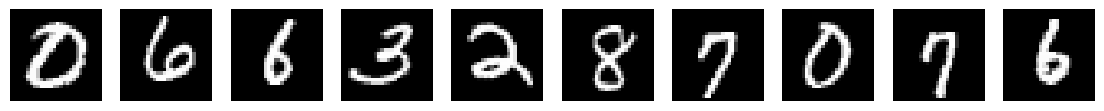

In [25]:
plot_digits(to_plot, nb)

> **Your turn!** Use the interact widget to create a widget for displaying an image from the training set based on a slider to select the index. Use the `plot_digit` function.

<details>
<summary>Click <font color="red"><b>here</b></font> for a solution</summary>

A possible solution:

```python
from ipywidgets import interact
interact(plot_digit, image_idx=(0, 60000))
```
</details>

> **Your turn!** Make a function that plots a random selection of images from a specified class. For example `plot_images(image_class='8', nb=25)` should plot 25 random 8's from the training data:

<img src="https://github.com/alu042/DAT158-2022/raw/main/notebooks/assets/plot_MNIST_images.png">

<details>
<summary>Click <font color="red"><b>here</b></font> for a solution</summary>

Suggested solution:

```python
def plot_images(image_class, nb, X_train, y_train):
    """
    Plot a random selection of images from a specified class.

    Parameters:
    image_class (str): The class of images to plot.
    nb (int): The number of images to plot.
    X_train (array-like): The training data.
    y_train (array-like): The training labels.
    """
    # Get the indices of all images in the specified class
    indices = np.where(y_train == image_class)[0]

    # Choose nb random indices from the class
    random_indices = np.random.choice(indices, nb, replace=False)

    # Plot the images
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        image = np.array(X_train.iloc[random_indices[i]]).reshape(28, 28)
        ax.imshow(image, cmap='gray')
        ax.axis('off')
    plt.show()
```

</summary>
</details>

> You'll want to create many such small throwaway helper functions all the time when you're investigating a new data set.

# Multiclass classification model

In the previous notebook, we saw some major concepts and techniques in binary classification. Let's try to predict something more challenging: all the ten classes in MNIST.

The ideas behind multiclass predictions are the same, but the difficulty for our models is increased. 

Superficially, not much changes. We can use the same scikit-learn models as before because scikit-learn takes care of adapting models for multiclass predictions—for example, `SGDClassifier` and the `RandomForestClassifier`.

> As a side note: these are not the kinds of models you would use for computer vision problems these days. You've heard of **"deep learning"** and the **revolution** it has caused in machine learning during the last couple of years. Where it started, and where it's made the most impact until now, is in computer vision. Using deep learning, it is straightforward to reach models that score almost perfectly on MNIST. Very few images will be misclassified (< 30 of the 10.000 test images). And for some of these images, we would agree with the machine's predictions if we take a look ourselves. Modern deep learning has blown away MNIST as a benchmark by essentially "solving" it. 

In [26]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [27]:
sgd_clf = SGDClassifier(random_state=42, n_jobs=-1)
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)

As we've previously discussed, it's important to normalize the data when using the `SGDClassifier`. Stochastic Gradient Descent (SGD) is sensitive to the scale of different features. When features have different ranges, the shape of the cost function—essentially a measure of how well the model is doing—becomes skewed. This makes it challenging for the algorithm to efficiently find the optimal solution (i.e., the best set of parameters for the model). Normalizing the data puts all features on the same scale, resulting in a more efficient and stable optimization process (quicker convergence; reduced chance of getting stuck in a local minimum).

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

We can then fit the models and make predictions:

In [30]:
%%time
sgd_clf.fit(X_train_std, y_train)

CPU times: total: 6min 31s
Wall time: 58.9 s


SGDClassifier(n_jobs=-1, random_state=42)

> Note that in contrast to `SGDClassifier`, the `RandomForestClassifier` is not sensitive to the scale of the features. This is because random forests make decisions based on the 'purity' of the labels at each split in the decision trees, rather than the magnitude or scale of the features. Each decision tree in the forest makes binary decisions—like 'Is Feature A greater than some value?'—to partition the data. These decisions are not influenced by the scale of the feature values, making normalization generally unnecessary when using random forests. We'll see exactly how random forests work in Module 2 of the course. 

With the random forest classifier, we can use the original, unscaled X_train:

In [31]:
%%time
rf_clf.fit(X_train, y_train)

CPU times: total: 1min 15s
Wall time: 3 s


RandomForestClassifier(n_jobs=-1, random_state=42)

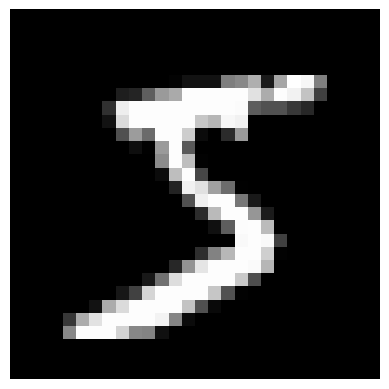

In [32]:
some_digit_idx = 0
plot_digit(some_digit_idx)

Here are the predictions from our two models:

In [33]:
some_digit_image = X_train.iloc[some_digit_idx]

In [34]:
sgd_clf.predict([some_digit_image])

array(['3'], dtype='<U1')

In [35]:
rf_clf.predict([some_digit_image])

array(['5'], dtype=object)

Behind the scenes, scikit-learn trained 10 binary classifiers for us, and used them all on the `some_digit` data point. The class whose decision score was the highest was the ouput from `predict`:

In [36]:
sgd_clf.decision_function([some_digit_image])

array([[ -52074.00622961,  -90932.76755577,  -20253.71519718,
          13700.40693397, -153621.49226805,   -4632.87432725,
        -107360.91391427,  -90145.62086593,    -980.42911341,
         -44100.09135652]])

In [37]:
# Return the position of the element with the highest value in the array. 
# That is the model's prediction.

np.argmax(sgd_clf.decision_function([some_digit_image]))

3

We can do the same with random forest classifiers by asking for the list of probabilities that the random forest assigned to each class:

In [38]:
rf_clf.predict_proba([some_digit_image])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

...and notice that the sixth class (corresponding to 5s) got assigned the highest probability.

In [39]:
np.argmax(rf_clf.predict_proba([some_digit_image]))

5

## Evaluation

We can then use the same evaluation techniques that we used in the previous notebook:

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

### Cross-validation

We first compute predictions on all the training data using `cross_val_predict`:

In [41]:
# Warning: These computations take some time (depending on your CPU)...
sgd_train_pred = cross_val_predict(sgd_clf, X_train_std, y_train, n_jobs=-1)
rf_train_pred = cross_val_predict(rf_clf, X_train, y_train, n_jobs=-1)

Then we can compute the accuracy on the training data (NB: note that we used `cross_val_predict` which means that the predictions are on data unseen during model fitting/training).

In [42]:
accuracy_score(y_train, sgd_train_pred)

0.8955833333333333

In [43]:
accuracy_score(y_train, rf_train_pred)

0.96645

### Accuracy on the test set

Based on the above cross-validation performance, we may decide to work more on our model selection steps (feel free to try out whatever you can think of!). Once that's completely done, we can evaluate the model on the test set to get our estimated generalization performance:

In [44]:
accuracy_score(y_test, sgd_clf.predict(X_test))

0.8253

In [45]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.9705

### Confusion matrix


Let's compare the two classifiers' confusion matrices:

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
sgd_cm = confusion_matrix(y_train, sgd_train_pred)
rf_cm = confusion_matrix(y_train, rf_train_pred)

In [48]:
print("SGD Confusion Matrix:")
print(sgd_cm)
print()
print("RF Confusion Matrix:")
print(rf_cm)

SGD Confusion Matrix:
[[5570    0   15    3    9   39   33    5  248    1]
 [   0 6408   41   21    3   41    4    7  208    9]
 [  26   25 5220   85   67   24   62   37  401   11]
 [  26   18  107 5187    0  184   24   39  483   63]
 [  10   13   36    9 5183   10   34   20  381  146]
 [  26   18   23  155   51 4401   77   13  596   61]
 [  26   17   41    2   40   83 5548    7  154    0]
 [  20   11   52   23   48   11    3 5685  217  195]
 [  16   58   37   88    2  119   28    8 5459   36]
 [  21   19   28   58  119   30    1  170  429 5074]]

RF Confusion Matrix:
[[5846    2    7    2    4    6   19    1   32    4]
 [   1 6636   32   16   15    4    7   15   10    6]
 [  24   11 5756   30   31    2   19   39   39    7]
 [   8    6   84 5815    2   66    8   53   61   28]
 [  12   12   11    0 5670    0   20   11   17   89]
 [  25    7   11   58    9 5210   41    5   32   23]
 [  25   11    1    0    8   33 5818    0   22    0]
 [   4   22   64    6   41    1    1 6044   13   69]
 

As we've seen, they can also be displayed in a more visually appealing way using `ConfusionMatrixDisplay`:

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

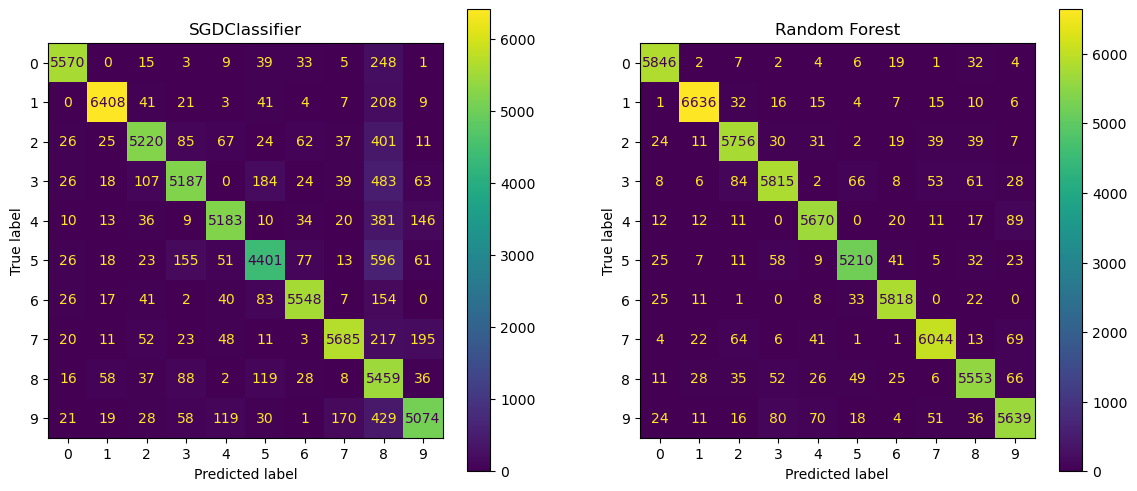

In [50]:
# Create a confusion matrix display for two different classifiers
predictions = [sgd_train_pred, rf_train_pred]
classifier_names = ["SGDClassifier", "Random Forest"]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for i, (prediction, classifier_name) in enumerate(zip(predictions, classifier_names)):
    ConfusionMatrixDisplay.from_predictions(y_train, prediction, ax=axes[i])
    axes[i].set_title(classifier_name)
plt.show()

Both confusion matrices look pretty good: most of the images land on the diagonal. However, there are errors, and there seem to be some patterns in them... So let's take a closer look.

Another side-note: **Accuracy, precision, recall in multiclass settings**

> In  a previous exercise, I asked you to consider how to define precision and recall in a multiclass setting. Think about it again. See if you can figure out how the following numbers are computed: 

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_train, rf_train_pred, digits=3))

              precision    recall  f1-score   support

           0      0.978     0.987     0.982      5923
           1      0.984     0.984     0.984      6742
           2      0.957     0.966     0.961      5958
           3      0.960     0.948     0.954      6131
           4      0.965     0.971     0.968      5842
           5      0.967     0.961     0.964      5421
           6      0.976     0.983     0.979      5918
           7      0.971     0.965     0.968      6265
           8      0.955     0.949     0.952      5851
           9      0.951     0.948     0.949      5949

    accuracy                          0.966     60000
   macro avg      0.966     0.966     0.966     60000
weighted avg      0.966     0.966     0.966     60000



# Error analysis

We can zoom in on the errors in the confusion matrices by disregarding the main diagonal. But, first, we have to scale each value by the number of images in the corresponding class to properly compare error rates. In other words, we convert raw counts into proportions or percentages. Otherwise, if there's an imbalance in the classes&ndash;with some classes having more samples than others&ndash;the sheer volume of classifications related to those classes could overshadow meaningful patterns of misclassifications in other, less populous classes. 

We can also put zeros on the diagonal to better see the patterns elsewhere:

In [53]:
row_sums = sgd_cm.sum(axis=1, keepdims=True)
norm_sgd_cm = sgd_cm / row_sums
np.fill_diagonal(norm_sgd_cm, 0)

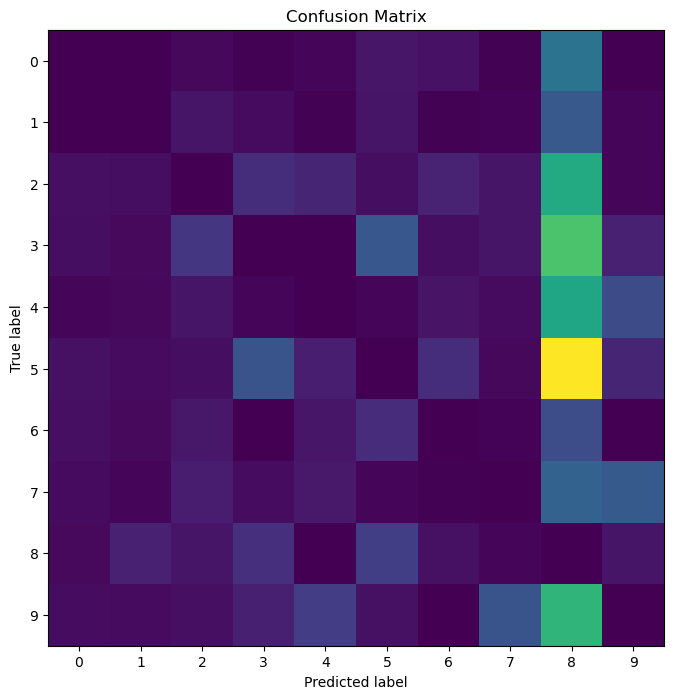

In [54]:
# Display the confusion matrix for a classifier
fig, axes = plt.subplots(figsize=(12, 8))
axes.imshow(norm_sgd_cm)
axes.set_xticks(range(10))
axes.set_yticks(range(10))
axes.set_xticklabels(range(10))
axes.set_yticklabels(range(10))
axes.set_xlabel("Predicted label")
axes.set_ylabel("True label")
axes.set_title("Confusion Matrix")
plt.show()

In [55]:
row_sums = rf_cm.sum(axis=1, keepdims=True)
norm_rf_cm = rf_cm / row_sums
np.fill_diagonal(norm_rf_cm, 0)

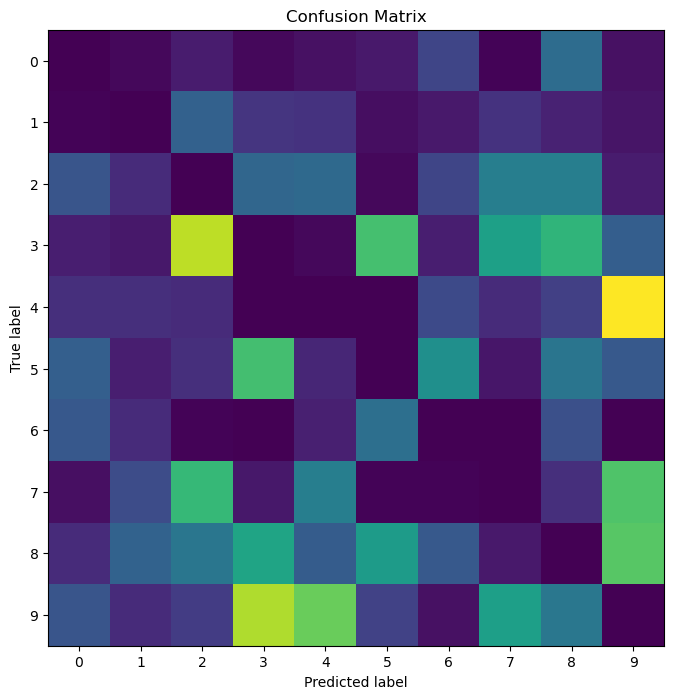

In [56]:
# Display the confusion matrix for a classifier
fig, axes = plt.subplots(figsize=(12, 8))
axes.imshow(norm_rf_cm)
axes.set_xticks(range(10))
axes.set_yticks(range(10))
axes.set_xticklabels(range(10))
axes.set_yticklabels(range(10))
axes.set_xlabel("Predicted label")
axes.set_ylabel("True label")
axes.set_title("Confusion Matrix")
plt.show()

We notice several interesting things:
- For the SGDClassifier, the entire column 8 is bright --> many 8s get misclassified, most frequently as 5s.
- The patterns of errors in the SGDClassifier and the Random Forest classifier is quite different. This can lead us to prefer one over the other, depending on which class confusions we care most about. 

This gives us some ideas for improving our model. Perhaps we should try to improve the 8 and 9 classifications in the random forest, or work to fix the 8/5 confusion for the SGDClassifier.

## Analyzing individual errors

Let's plot some 3s and 5s. Some 3s that the model got correct, some it confused for 5s. Some 5s the confused for 3s, and some correct 5s. 

In [85]:
# Code taken from the book _Géron: Hands-On Machine Learning with Scikit-Learn and TensorFlow_
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances.values]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [86]:
def individual_errors(classifier, class_a, class_b):
    """
    Display individual errors made by a classifier.

    Parameters:
        classifier (object): The classifier to use.
        class_a (int): The first class to compare.
        class_b (int): The second class to compare.

    Returns:
        None
    """
    class_a, class_b = str(class_a), str(class_b)
    X_aa = X_train[(y_train == class_a) & (classifier.predict(X_train) == class_a)]  # Correct class a's
    X_ab = X_train[(y_train == class_a) & (classifier.predict(X_train) == class_b)]  # a's predicted as b's
    X_ba = X_train[(y_train == class_b) & (classifier.predict(X_train) == class_a)]  # b's predicted as a's
    X_bb = X_train[(y_train == class_b) & (classifier.predict(X_train) == class_b)]  # Correct b's

    plt.figure(figsize=(10, 10))
    plt.suptitle(f"Individual Errors: {class_a} vs {class_b}")

    if len(X_aa) > 0:
        ax1 = plt.subplot(221)
        plot_digits(X_aa[:25], images_per_row=5)
        ax1.text(0.5, 1.05, f"Correct {class_a}'s", ha='center', transform=ax1.transAxes)

    if len(X_ab) > 0:
        ax2 = plt.subplot(222)
        plot_digits(X_ab[:25], images_per_row=5)
        ax2.text(0.5, 1.05, f"{class_a}'s predicted as {class_b}'s", ha='center', transform=ax2.transAxes)

    if len(X_ba) > 0:
        ax3 = plt.subplot(223)
        plot_digits(X_ba[:25], images_per_row=5)
        ax3.text(0.5, 1.05, f"{class_b}'s predicted as {class_a}'s", ha='center', transform=ax3.transAxes)

    if len(X_bb) > 0:
        ax4 = plt.subplot(224)
        plot_digits(X_bb[:25], images_per_row=5)
        ax4.text(0.5, 1.05, f"Correct {class_b}'s", ha='center', transform=ax4.transAxes)
    plt.show()

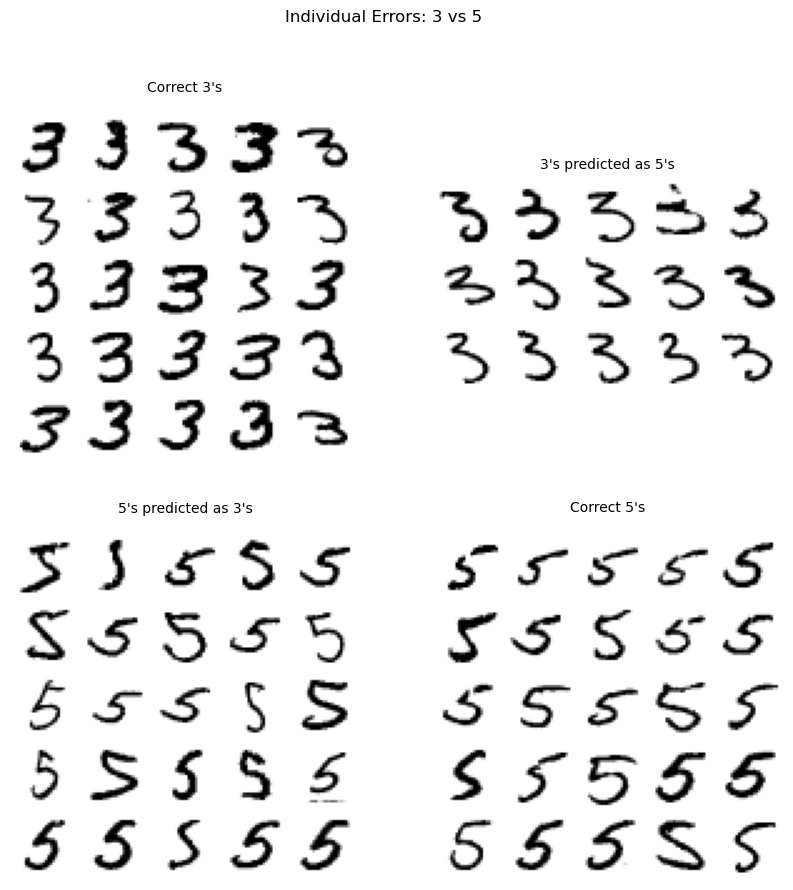

In [87]:
individual_errors(sgd_clf, 3, 5)

The SGDClassifier is a linear model. All it does is assign a weight per class to each pixel, and when it sees a new image it just sums up the wighted pixel intensities to get a score for each class. Since 3s and 5s only differ by a few pixels, this model will easily confuse them. Same for 7s and 9s:

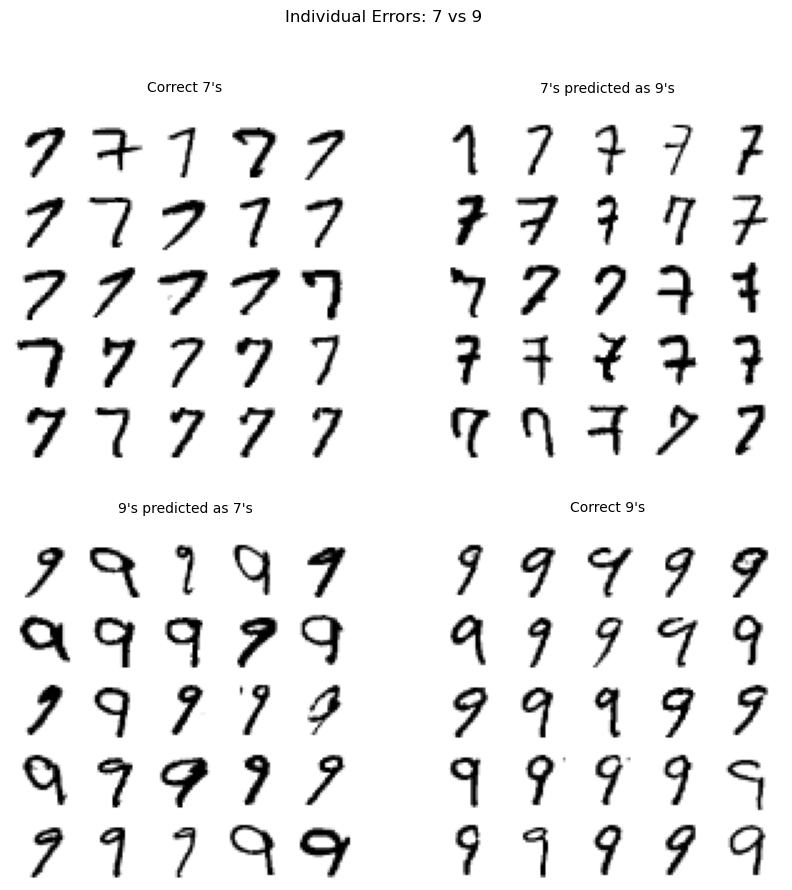

In [88]:
individual_errors(sgd_clf, 7, 9)

For example, one would expect it to perform better on 1s and 4s:

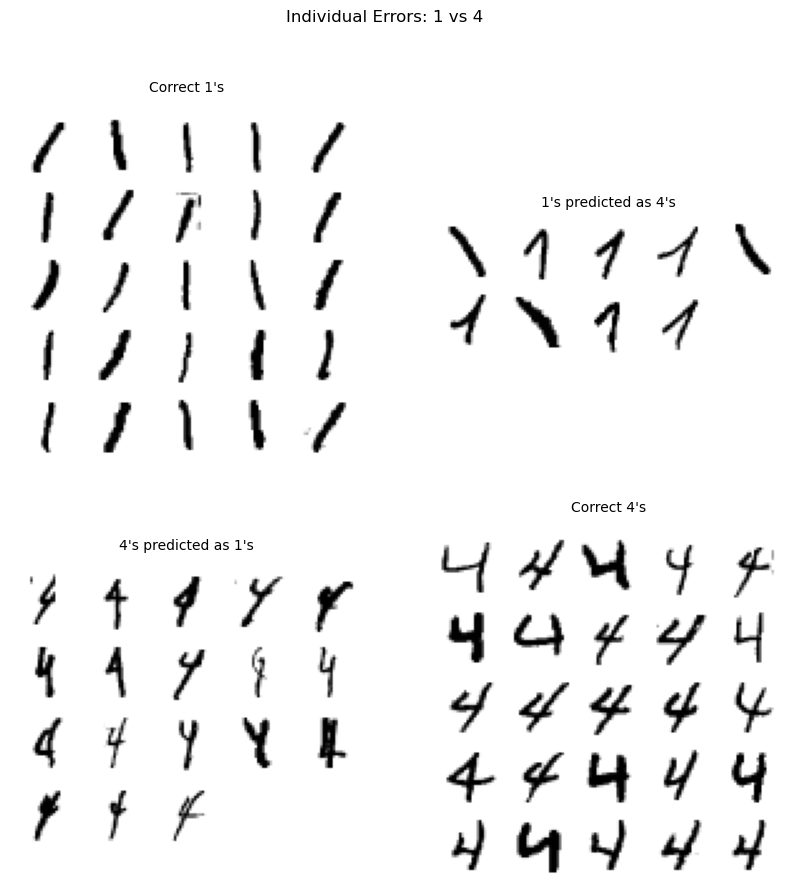

In [89]:
individual_errors(sgd_clf, 1, 4)

> **Your turn!** Do a similar error analysis for the Random Forest classifier. You can use the individual_errors function. Pay attention to which classes are most often confused and think about why this might be the case.

# End

In this module, we've delved into the foundational concepts and techniques of practical machine learning. From understanding the data and feature engineering to model selection and evaluation, you've gained the tools to tackle real-world predictive challenges.

While we've applied various models, we've only scratched the surface. We've treated these algorithms as black boxes, not yet delving into the underlying mechanics that power these predictive tools. Understanding the 'how' behind the 'what' is essential for fine-tuning models, diagnosing issues, and becoming a proficient machine learning practitioner.

In Module 2 of the course, we'll examine these algorithms and models, exploring how and why they work. 